# 1-1

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import math

In [110]:
def make_data(means,vars, data_num):
    assert(len(means)==len(vars) and len(vars)==2)
    X=np.concatenate([np.random.multivariate_normal(means[i],vars[i],data_num) for i in range(2)])
    Y=np.concatenate([np.zeros(data_num),np.ones(data_num)])
    return X,Y
X,Y=make_data([[1,0],[0,1.5]],[[[1,0.75],[0.75,1]],[[1,0.75],[0.75,1]]],500)
X_test,Y_test=make_data([[1,0],[0,1.5]],[[[1,0.75],[0.75,1]],[[1,0.75],[0.75,1]]],200)

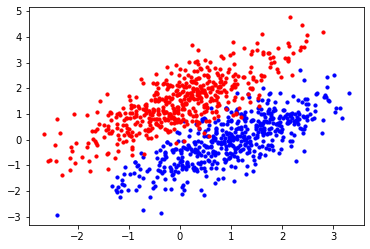

In [111]:
plt.scatter(X[:500,0],X[:500,1],s=10,c='b')
plt.scatter(X[500:,0],X[500:,1],s=10,c='r')

In [112]:
# my own Naive Bayes Classifier [pred, posterior, err] = myNB(X,Y,X_test,Y_test)
def myNB(X,Y,X_test,Y_test):
    labels=np.unique(Y)
    label_prob=np.array([np.count_nonzero(Y==label) for label in labels])/len(Y)
    label_means=[np.mean(X[Y==label],axis=0) for label in labels]
    label_vars=[np.var(X[Y==label],axis=0) for label in labels]
    all_means=np.mean(X)
    right_num=0
    posterior=[]
    pred=[]
    for i,x in enumerate(X_test):
        label_posterior = [label_prob[j]* \
         np.prod([scipy.stats.norm(label_means[j][dim],math.sqrt(label_vars[j][dim])).pdf(x_dim) \
         for dim, x_dim in enumerate(x)])
         for j in range(len(labels))]
        x_evidence=sum(label_posterior)
        y_pred=np.argmax(label_posterior)
        pred.append(labels[y_pred])
        posterior.append(label_posterior[y_pred]/x_evidence)
        if labels[y_pred]==Y_test[i]:
            right_num+=1
    return pred, posterior, 1-right_num/len(X_test)

In [113]:
myNB(X,Y,X_test,Y_test)

([0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,

In [114]:
def myEval(Y, pred):
    epsilon=1e-5
    right=0
    tp=0
    fn=0
    fp=0
    for i in range(len(pred)):
        if pred[i]==Y[i]:
            right+=1.0
        if pred[i]:
            if Y[i]:
                tp+=1.0
            else:
                fp+=1.0
        elif Y[i]:
            fn+=1.0
    accuracy = right/(len(pred)+epsilon)
    precision=tp/(tp+fp+ epsilon)
    recall=tp/(tp+fn+ epsilon)
    return accuracy, precision, recall, tp,fn,fp, len(pred)-tp-fn-fp

In [115]:
res= np.array([0]*7, dtype=np.float64)
for i in range(10):
    X,Y=make_data([[1,0],[0,1.5]],[[[1,0.75],[0.75,1]],[[1,0.75],[0.75,1]]],500)
    pred, posterior, err = myNB(X,Y,X_test,Y_test)
    res  += myEval(Y_test, pred)
res /= 10
print(f'average mean : {res[0]}, average pre : {res[1]}, average rec : {res[2]}')
print(f'average confusion matrix is here. ')
print(f'tp, fn : {res[3]}, {res[4]}')
print(f'fp, tn : {res[5]}, {res[6]}')    

average mean : 0.9434999764125006, average pre : 0.9345278333679072, average rec : 0.9539999523000023
average confusion matrix is here. 
tp, fn : 190.8, 9.2
fp, tn : 13.4, 186.6


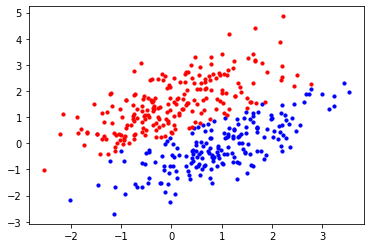

In [116]:
pred=np.array(pred)
X_0=X_test[pred==0]
X_1=X_test[pred==1]
plt.scatter(X_0[:,0],X_0[:,1],s=10,c='b')
plt.scatter(X_1[:,0],X_1[:,1],s=10,c='r')

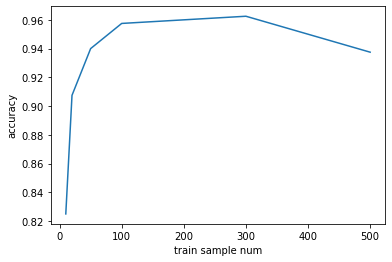

In [117]:
acc_list=[]
train_len_list=[10, 20, 50, 100, 300, 500]
for train_len in train_len_list:
    X,Y=make_data([[1,0],[0,1.5]],[[[1,0.75],[0.75,1]],[[1,0.75],[0.75,1]]],train_len)
    _,_, err = myNB(X,Y,X_test,Y_test)
    acc_list.append(1-err)
plt.plot(train_len_list, acc_list)
plt.xlabel('train sample num')
plt.ylabel('accuracy')
plt.show()

# 1-2

In [56]:
import pandas as pd
from sklearn.model_selection import KFold

In [57]:
nba_whole_data=pd.read_excel('nbastat2021.xlsx', engine='openpyxl')
nba_whole_data=nba_whole_data.rename(columns={'PPGPointsPoints per game.':'PPG','RPGReboundsRebounds per game.':'RPG',
                     'APGAssistsAssists per game.':'APG','SPGStealsSteals per game.':'SPG', 
                    'BPGBlocksBlocks per game.':'BPG', 'TOPGTurnoversTurnovers per game.':'TOPG'})
nba_data=np.array(nba_whole_data.iloc[:,4:-1])
nba_data
pos=np.array(nba_whole_data['POS'])

In [58]:
kf=KFold(n_splits=6)
acc_list=[]
for train, test in kf.split(nba_data):
    X, Y =nba_data[train], pos[train]
    X_test, Y_test = nba_data[test], pos[test]
    _,_, err = myNB(X,Y,X_test,Y_test)
    acc_list.append(1-err)
print(f'average accuracyy : {np.mean(acc_list)}, std of accuracy : {np.std(acc_list)}')
    

average accuracyy : 0.5666666666666667, std of accuracy : 0.053359368645273735


# 2-1

In [74]:
X,Y=make_data([[1,0],[0,1.5]],[[[1,0.75],[0.75,1]],[[1,0.75],[0.75,1]]],500)
X_test,Y_test=make_data([[1,0],[0,1.5]],[[[1,0.75],[0.75,1]],[[1,0.75],[0.75,1]]],200)

In [101]:
def sigmoid(weights,x):
    return 1/(1+np.exp(-np.sum(weights@x)))
def LR(X,Y, X_test, Y_test, lr=0.01, return_loss=False):
    input_dim=X.shape[1]
    weights=np.random.rand(input_dim+1)
    obj_fun=0
    if return_loss:
        loss_list=[]
    for iteration in range(10000):
        if iteration % 500 == 499:
            print(f'{iteration+1}th iteration, cross entropy : {obj_fun}')
        deriv_per_dim=np.array([0 for _ in range(input_dim+1)], dtype=np.float64)
        old_obj_fun=obj_fun
        obj_fun=0
        for i in range(len(Y)):
            x=np.insert(X[i],0,1)
            s=sigmoid(weights,x)
            deriv=s-Y[i]
            for j in range(input_dim+1):
                deriv_per_dim[j]+=deriv*x[j]
            obj_fun+=-Y[i]*math.log(s)-(1-Y[i])*math.log(1-s)
        deriv_per_dim /= len(Y)
        if np.linalg.norm(deriv_per_dim) < 1e-3 or (old_obj_fun >= obj_fun and old_obj_fun-obj_fun<1e-2):
            print(f'Early stop at iter {iteration+1}, cross entropy : {obj_fun}')
            break
        weights-=lr*deriv_per_dim
        if return_loss:
            loss_list.append(obj_fun)
    rights=0
    pred_Y=[]
    for i,y in enumerate(Y_test):
        x=np.insert(X_test[i],0,1)
        pred_Y.append(sigmoid(weights,x))
        if pred_Y[i]>0.5: 
            if y:
                rights+=1
        else:
            if not y:
                rights+=1
    print('Learning End.')
    print(f'Final accuracy for test data is {rights / len(Y_test)}.')
    if return_loss:
        return pred_Y, rights / len(Y_test), weights, loss_list
    return pred_Y, rights / len(Y_test), weights

In [102]:
LR(X,Y,X_test,Y_test)

500th iteration, cross entropy : 294.2874623630572
1000th iteration, cross entropy : 224.0849415371728
1500th iteration, cross entropy : 191.4901515931656
2000th iteration, cross entropy : 172.41828173852625
2500th iteration, cross entropy : 159.80424796066754
3000th iteration, cross entropy : 150.80248147013253
3500th iteration, cross entropy : 144.03750839021438
Early stop at iter 3861, cross entropy : 140.097016574994
Learning End.
Final accuracy for test data is 0.95.


([0.6256962234092865,
  0.11357985224416524,
  0.03390287494118003,
  0.09521583652846521,
  0.0014776148366987796,
  0.11875733263448783,
  0.07138857252268761,
  0.6726447292544849,
  0.029210001319018016,
  0.03267816701731153,
  0.021658743987962074,
  0.017454198115471775,
  0.0866625479725893,
  0.09630033295799524,
  0.026463354786608283,
  0.01113116444654406,
  0.026638587070573844,
  0.29153215090605666,
  0.003905158585695226,
  0.062454672580014234,
  0.020566404290869783,
  0.015807746869023163,
  0.010368753305077425,
  0.006221154237982104,
  0.12539433071967276,
  0.46516590493496074,
  0.00822229861733354,
  0.39201740547059905,
  0.17256106689018322,
  0.4489218194944734,
  0.051499376246958786,
  0.057893978589181515,
  0.0017594832711240135,
  0.03365267521399318,
  0.1593453791515392,
  0.10683069126558904,
  0.040103918321218214,
  0.033855084149525684,
  0.27291046689544274,
  0.024494949802302022,
  0.021547111691616667,
  0.028197595731825707,
  0.0156537363215

In [99]:
def eval (y_pred, acc, weights):
    #print(f'accuracy : {acc}')
    fper, tper, thresholds = roc_curve(Y_test, y_pred)
    plt.plot(fper ,tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    y_pred=np.array(y_pred)
    print(f'final weights are {weights}.')
    X_0=X_test[y_pred<0.5]
    X_1=X_test[y_pred>=0.5]
    w0, w1, w2 = weights
    db_x=np.linspace(min(X_test[:,0]),max(X_test[:,1]))
    db_y=-w0/w2-w1/w2*db_x
    plt.plot(db_x,db_y, color='green', linestyle=':')
    plt.scatter(X_0[:,0],X_0[:,1],s=10,c='b')
    plt.scatter(X_1[:,0],X_1[:,1],s=10,c='r')
    plt.show()

Learning Rate is 1.
Early stop at iter 348, cross entropy : 102.81197137315252
Learning End.
Final accuracy for test data is 0.9525.


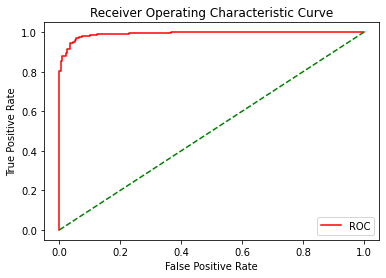

final weights are [-1.40914506 -4.09809376  4.56892872].


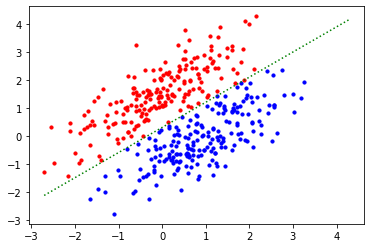

Learning Rate is 0.1.
500th iteration, cross entropy : 131.24518282879188
1000th iteration, cross entropy : 114.46537194340506
Early stop at iter 1316, cross entropy : 110.278007588425
Learning End.
Final accuracy for test data is 0.9525.


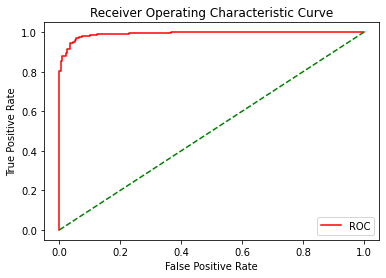

final weights are [-1.09598852 -3.31909092  3.7015957 ].


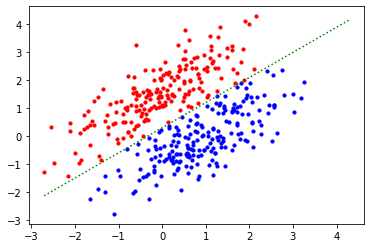

Learning Rate is 0.01.
500th iteration, cross entropy : 331.73182843909024
1000th iteration, cross entropy : 237.94209338511942
1500th iteration, cross entropy : 198.782837794676
2000th iteration, cross entropy : 176.9534658271168
2500th iteration, cross entropy : 162.91314853869687
3000th iteration, cross entropy : 153.07367854142797
3500th iteration, cross entropy : 145.77266509674814
4000th iteration, cross entropy : 140.12981378028988
Early stop at iter 4002, cross entropy : 140.0998087868482
Learning End.
Final accuracy for test data is 0.95.


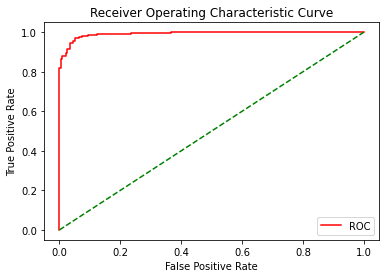

final weights are [-0.67955973 -2.31221878  2.5628426 ].


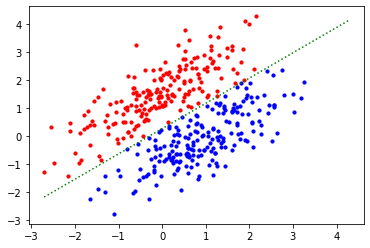

In [106]:
for lr in [1, 0.1, 0.01]:
    print(f'Learning Rate is {lr}.')
    y_pred, acc, weights=LR(X,Y,X_test,Y_test,lr=lr)
    eval(y_pred, acc, weights)

In [13]:
#needs to draw edge weights and decision boundary

# 2-2

In [104]:
def LR_online(X,Y, X_test, Y_test, lr=0.01, return_loss=False):
    input_dim=X.shape[1]
    weights=np.random.rand(input_dim+1)
    obj_fun=0
    weights_do_not_change=0
    permute_tmp = np.random.permutation(len(X))
    X=X[permute_tmp]
    Y=Y[permute_tmp]

    if return_loss:
        loss_list=[]
    for iteration in range(10000):
        if iteration % 500 == 499:
            print(f'{iteration+1}th iteration, cross entropy : {obj_fun}')
        early_stop=False
        if iteration > 0 and old_obj_fun >= obj_fun and old_obj_fun - obj_fun < 1e-2:
            print(f'Early stop at iter {iteration+1}, cross entropy : {old_obj_fun}')
            break
        old_obj_fun=obj_fun
        obj_fun=0
        for i in range(len(Y)):
            deriv_per_dim=np.array([0 for _ in range(input_dim+1)], dtype=np.float64)
            x=np.insert(X[i],0,1)
            s=sigmoid(weights,x)
            deriv=s-Y[i]
            obj_fun+=-Y[i]*math.log(s)-(1-Y[i])*math.log(1-s)
            for j in range(input_dim+1):
                deriv_per_dim[j]+=deriv*x[j]
            if np.linalg.norm(deriv_per_dim) < 1e-3:
                weights_do_not_change+=1
            else:
                weights_do_not_change=0
            if weights_do_not_change == 1000:
                if iteration > 0:
                    print(f'Early stop at iter {iteration+1}, cross entropy : {old_obj_fun}')
                else:
                    print(f'Early stop at iter {iteration+1}')
                early_stop=True
                break
            weights-=lr*deriv_per_dim
        if return_loss:
            loss_list.append(obj_fun)
        if early_stop:
            break
    rights=0
    pred_Y=[]
    for i,y in enumerate(Y_test):
        x=np.insert(X_test[i],0,1)
        pred_Y.append(sigmoid(weights,x))
        if sigmoid(weights,x)>0.5: 
            if y:
                rights+=1
        else:
            if not y:
                rights+=1
    print('Learning End.')
    print(f'Final accuracy for test data is {rights / len(Y_test)}.')
    if return_loss:
        return pred_Y, rights / len(Y_test), weights, loss_list
    return pred_Y, rights / len(Y_test), weights

In [118]:
def eval_without_roc (y_pred, acc, weights):
    y_pred=np.array(y_pred)
    print(f'final weights are {weights}.')
    X_0=X_test[y_pred<0.5]
    X_1=X_test[y_pred>=0.5]
    w0, w1, w2 = weights
    db_x=np.linspace(min(X_test[:,0]),max(X_test[:,1]))
    db_y=-w0/w2-w1/w2*db_x
    plt.plot(db_x,db_y, color='green', linestyle=':')
    plt.scatter(X_0[:,0],X_0[:,1],s=10,c='b')
    plt.scatter(X_1[:,0],X_1[:,1],s=10,c='r')
    plt.show()

In [105]:
print('Online training')
for lr in [1, 0.1, 0.01]:
    print (f'lr is {lr}')
    print (f'accuracy : {LR_online(X,Y,X_test,Y_test,lr=lr)[1]}')

Online training
lr is 1
Early stop at iter 32, cross entropy : 167.42745598438236
Learning End.
Final accuracy for test data is 0.93.
accuracy : 0.93
lr is 0.1
Early stop at iter 12, cross entropy : 104.83951831825765
Learning End.
Final accuracy for test data is 0.945.
accuracy : 0.945
lr is 0.01
Early stop at iter 72, cross entropy : 102.07444462327082
Learning End.
Final accuracy for test data is 0.9525.
accuracy : 0.9525


Learning Rate is 1.
Early stop at iter 48, cross entropy : 126.46836635673985
Learning End.
Final accuracy for test data is 0.9575.
final weights are [-3.79910626 -9.25686049  8.91261167].


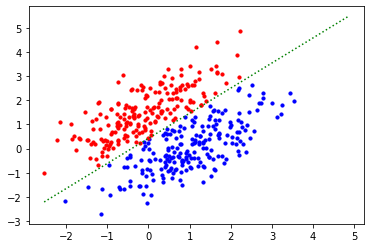

Learning Rate is 0.1.
Early stop at iter 16, cross entropy : 90.43954889895825
Learning End.
Final accuracy for test data is 0.9625.
final weights are [-1.74909808 -5.76716536  5.94479569].


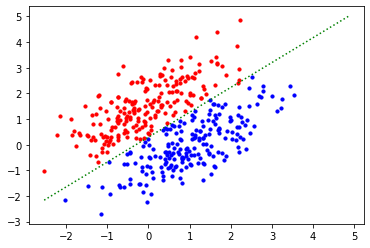

Learning Rate is 0.01.
Early stop at iter 97, cross entropy : 86.75635733394708
Learning End.
Final accuracy for test data is 0.96.
final weights are [-1.72578392 -5.20711553  5.83650693].


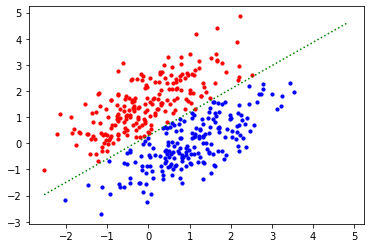

In [121]:
for lr in [1, 0.1, 0.01]:
    print(f'Learning Rate is {lr}.')
    y_pred, acc, weights=LR_online(X,Y,X_test,Y_test,lr=lr)
    eval_without_roc(y_pred, acc, weights)

# 2-3

Learning Rate is 1.
Early stop at iter 441, cross entropy : 88.08923359108722
Learning End.
Final accuracy for test data is 0.96.
Early stop at iter 42, cross entropy : 148.5073986016573
Learning End.
Final accuracy for test data is 0.955.


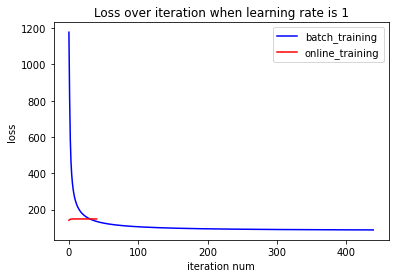

Learning Rate is 0.1.
500th iteration, cross entropy : 125.5571516909012
1000th iteration, cross entropy : 105.46416739217906
1500th iteration, cross entropy : 97.98999881845515
Early stop at iter 1517, cross entropy : 97.80821587703736
Learning End.
Final accuracy for test data is 0.96.
Early stop at iter 14, cross entropy : 89.30706375590114
Learning End.
Final accuracy for test data is 0.9675.


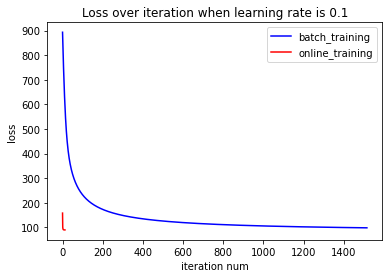

Learning Rate is 0.01.
500th iteration, cross entropy : 324.55248278010595
1000th iteration, cross entropy : 235.96283751168033
1500th iteration, cross entropy : 196.66584452091686
2000th iteration, cross entropy : 174.1422868604417
2500th iteration, cross entropy : 159.3791088239589
3000th iteration, cross entropy : 148.87442574472277
3500th iteration, cross entropy : 140.97555918824483
4000th iteration, cross entropy : 134.79630329062755
Early stop at iter 4233, cross entropy : 132.3396174403042
Learning End.
Final accuracy for test data is 0.96.
Early stop at iter 97, cross entropy : 86.76745881780187
Learning End.
Final accuracy for test data is 0.96.


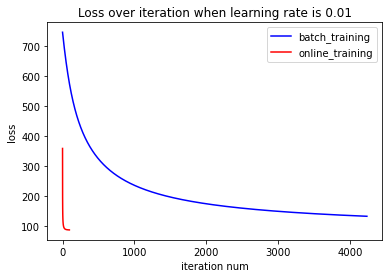

In [122]:
for lr in [1, 0.1, 0.01]:
    print(f'Learning Rate is {lr}.')
    _,_,_,loss_list=LR(X,Y,X_test,Y_test,lr=lr,return_loss=True)
    x=[i for i in range(len(loss_list))]
    plt.plot(x ,loss_list, color='blue', label='batch_training')
    _,_,_,loss_list=LR_online(X,Y,X_test,Y_test,lr=lr,return_loss=True)
    x=[i for i in range(len(loss_list))]
    plt.plot(x ,loss_list, color='red', label='online_training')
    plt.xlabel('iteration num')
    plt.ylabel('loss')
    plt.title(f'Loss over iteration when learning rate is {lr}')
    plt.legend()
    plt.show()